In [304]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 8
from scipy.stats import foldnorm
from scipy.special import logsumexp,psi

## Problem 1

(1) Write down the likelihood function for θ.

$$
\mathcal{L}(\theta)=\prod_{j=1}^{n}\frac{(x_j\theta+r_j)^{y_j}}{y_j!}e^{-(x_j\theta+r_j)}
$$

(2) Introduce mutually independent latent variables $z_{j1} ∼ Poisson(x_j\theta)$ and $z_{j2} ∼Poisson(r_j)$ and suppose we observe only $y_j ≡ z_{j1} + z_{j2}$. Under this formulation, derive an EM algorithm to find the MLE of $\theta$.

$\text{complete log likelihood:}$
$$
l(y,z|\theta)=\sum_{j=1}^{n}{-x_j\theta+z_{j1}log(x_j\theta)-logz_{j1}!}+
\sum_{j=1}^{n}{-r_j+z_{j2}log(r_j)-logz_{j2}!}
$$
**E step:**
$$
Q^{(t)}(\theta)=E_{p(z|y,\theta^{(t)})}l(y,z|\theta)=\sum_{j=1}^{n}-x_j\theta+\mathbb{E}z_{j1}log(x_j\theta) + Const
$$
notice that:
$$
z_{j1}|y_j,\theta \sim Binomial(y_j, \frac{x_j\theta}{x_j\theta+r_j}) \\
z_{j2}|y_j,\theta \sim Binomial(y_j, \frac{r_j}{x_j\theta+r_j}) \\
$$
so we have:
$$
\mathbb{E}z_{j1}log(x_j\theta) = \frac{y_jx_j\theta^{(t)}}{x_j\theta^{(t)}+r_j}log(x_j\theta)
$$
**M step:**
$$
\nabla_{\theta}Q^{(t)}(\theta)=\sum_{j=1}^{n}-x_j+\frac{y_jx_j\theta^{(t)}}{x_j\theta^{(t)}+r_j}\frac{1}{\theta}
$$
$\text{let}\; \nabla_{\theta}Q^{(t)}(\theta)=0, \text{we get the update formula for}\;\theta :$
$$
\theta^{(t+1)}=\frac{\theta^{(t)}}{\sum_{j=1}^{n}x_j}\sum_{j=1}^{n}\frac{y_jx_j}{x_j\theta^{(t)}+r_j}
$$

(3) Apply your EM algorithm to the data set given by Table 1. What is the MLE?

In [35]:
x = np.array([1.41, 1.84, 1.64, 0.85, 1.32, 1.97, 1.70, 1.02, 1.84, 0.92])
r = np.array([0.94, 0.70, 0.16, 0.38, 0.40, 0.57, 0.24, 0.27, 0.60, 0.81])
y = np.array([13, 17, 6, 3, 7, 13, 8, 7, 5, 8])
theta = 0.01
# cache
while True:
    prev = theta
    theta = (theta/np.sum(x))*(np.sum(y*x/(x*theta+r)))
    if np.abs(theta-prev) < 1e-5:
        break
print("MLE estimation for theta: ", theta)

MLE estimation for theta:  5.606062860059316


(4) For these data compute the observed Fisher information and the fraction of missing information.

$\text{observed Fisher information:}$
$$
I_{observed} = -\nabla^2\mathcal{L}(\theta^*)=\sum_{j=1}^{n}\frac{y_jx_j^2}{(x_j\theta^*+r_j)^2} = 2.423
$$
$\text{complete Fisher information:}$
$$
I_{complete} = -\frac{\partial^2Q}{\partial\theta^2}(\theta^* | \theta^*) = \sum_{j=1}^{n}\frac{y_jx_j} = {x_j\theta^*+r_j}\frac{1}{\theta^*} = 2.588
$$
$\text{fraction of missing information:}$
$$
\frac{I_{complete}-I_{observed}}{I_{complete}} = 0.064
$$

In [ ]:
np.sum(y*x*x/(x*theta+r)**2)

In [ ]:
np.sum(y*x/(x*theta+r))/theta

## Problem 2

$\text{(1) Derive an EM algorithm to find the MLE of µ and}\;\sigma^2$

**E step:**
$$
l(x,y | \mu,\sigma^2) = \sum_{i=1}^{m}-\frac{(x_i-\mu)^2}{2\sigma^2}-\frac{1}{2}log\sigma^2 + Const \\
p(x_i|y_i,\mu_{(t)},\sigma^2_{(t)}) = \frac{exp\{-\frac{(x_i-\mu)^2}{2\sigma^2}\}}{exp\{-\frac{(x_i-\mu)^2}{2\sigma^2}\}
+exp\{-\frac{(x_i+\mu)^2}{2\sigma^2}\}} \\
Q^{(t)}(\mu, \sigma^2)=E_{p(x|y,\theta_{(t)})}l(x,y|\mu, \sigma^2) = \sum_{i=1}^{m}
-\frac{(y_i-\mu)^2}{2\sigma^2}\frac{1}{1+exp\{ -\frac{2\mu_{(t)} y_i}{ \sigma^2_{(t)} }  \}}
-\frac{(y_i+\mu)^2}{2\sigma^2}\frac{1}{1+exp\{ \frac{2\mu_{(t)} y_i}{ \sigma^2_{(t)} }  \}}
$$
**M step:（同第一题令梯度为0解出相应的参数）**
$$
\mu_{t+1} = \frac{\sum_{i=1}^{m}y_i\frac{1}{1+exp\{ -\frac{2\mu y_i}{ \sigma^2 }  \}}
+y_i\frac{1}{1+exp\{ \frac{2\mu y_i}{ \sigma^2 }  \}}
}{ \sum_{i=1}^{m}\frac{1}{1+exp\{ -\frac{2\mu y_i}{ \sigma^2 }  \}} + 
\frac{1}{1+exp\{ \frac{2\mu y_i}{ \sigma^2 }  \}}
} \\
\sigma^2_{t+1} = \frac{\sum_{i=1}^{m}(y_i-\mu)^2\frac{1}{1+exp\{ -\frac{2\mu y_i}{ \sigma^2 }  \}}
+(y_i+\mu)^2\frac{1}{1+exp\{ \frac{2\mu y_i}{ \sigma^2 }  \}}
}{ \sum_{i=1}^{m}\frac{1}{1+exp\{ -\frac{2\mu y_i}{ \sigma^2 }  \}} + 
\frac{1}{1+exp\{ \frac{2\mu y_i}{ \sigma^2 }  \}}
}
$$

(2) Apply your EM algorithm to the data with different starting values. Does your EM always converge to the same point estimate? If not, do you observe any pattern of your estimates? Explain it

In [259]:
y = np.load("absolute_gaussian_data.npy")

In [294]:
def EM(mu, sigma, max_iter):
    trace = [likelihood(mu, sigma)]
    for i in range(1, max_iter):
        # save old parameters
        mut = mu
        sigmat = sigma
        # update mu
        tmp1 = 1/(1 + np.exp(-2*mu*y/sigma))
        tmp2 = 1/(1 + np.exp(2*mu*y/sigma))
        mu = np.sum(y*(tmp1 - tmp2))/np.sum(tmp1 + tmp2)
        # update sigma^2
        # tmp1 =  1/(1 + np.exp(-2*mut*y/sigmat))
        # tmp2 =  1/(1 + np.exp(2*mut*y/sigmat))
        sigma = (np.sum((y-mu)**2*tmp1 + (y+mu)**2*tmp2))/(np.sum(tmp1+tmp2))
        trace.append(likelihood(mu, sigma))
    print("MLE estimation for mu: ", mu, "sigma^2: ", sigma)
    return np.array(trace)

不同的初始点得到的结果不同：

In [295]:
trace1 = EM(mu=0, sigma=1, max_iter=100)
trace1 = EM(mu=-1, sigma=1, max_iter=100)
trace1 = EM(mu=1, sigma=1, max_iter=100)

MLE estimation for mu:  0.0 sigma^2:  8.77718607226079
MLE estimation for mu:  -2.1230310076243155 sigma^2:  4.269925412926472
MLE estimation for mu:  2.1230310076243155 sigma^2:  4.269925412926472


### 因为这个似然函数其实是关于$\mu$对称的（见图1），因此用相反的$\mu$作为初始点收敛到的点也是对称的。另外$\mu=0$点比较特殊，在此点$\mu$不会更新（此处关于$\mu$的偏导数也为0，（普通）梯度下降算法也不会更新）

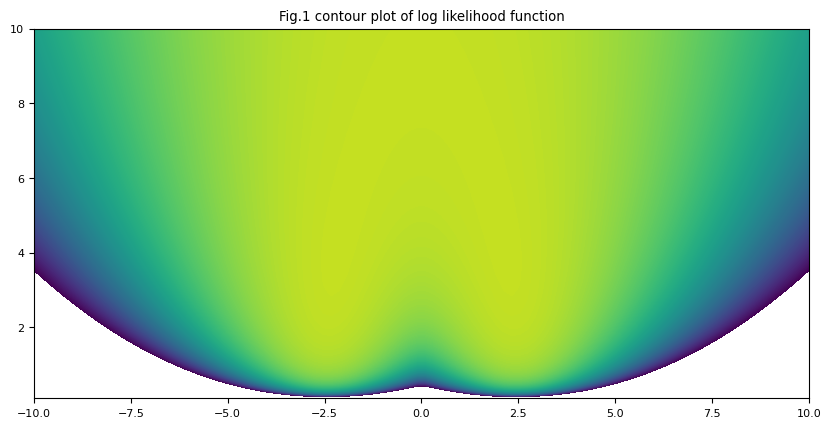

In [350]:
def draw_contourf():
    vl = np.vectorize(likelihood)
    fig = plt.figure(figsize=(10, 4.8))
    ax = fig.add_subplot(111)
    x = np.linspace(-10, 10, 100)
    y = np.linspace(0.1, 10, 200)
    mesh = np.meshgrid(x, y)
    Z = vl(mesh[0], mesh[1])
    ax.contourf(x, y, Z, np.arange(-1000, -100, 1))
    plt.title("Fig.1 contour plot of log likelihood function")
    plt.show()
draw_contourf()

(3) Derive the gradient of the parameters. Compare the standard gradient descent
method to EM. Show $l^∗ − l $ as a function of the number of iterations ($l$ is the log likelihood function and
$l^∗$is the optimal value of it) for both methods. Which one is
better in this case? Why?

In [115]:
def likelihood(mu, sigma):
    return np.sum(np.log(np.exp(-(y-mu)**2/(2*sigma)) + np.exp(-(y+mu)**2/(2*sigma)))-0.5*np.log(2*np.pi*sigma))

$${\displaystyle l=-{\frac {n}{2}}\log {2\pi \sigma ^{2}}+\sum _{i=1}^{n}\log {\left[e^{-{\frac {\left(x_{i}-\mu \right)^{2}}{2\sigma ^{2}}}}+e^{-{\frac {\left(x_{i}+\mu \right)^{2}}{2\sigma ^{2}}}}\right]}}$$
梯度：
$${\displaystyle {\frac {\partial l}{\partial \mu }}={\frac {\sum _{i=1}^{n}\left(x_{i}-\mu \right)}{\sigma ^{2}}}-{\frac {2}{\sigma ^{2}}}\sum _{i=1}^{n}{\frac {x_{i}}{1+e^{\frac {2\mu x_{i}}{\sigma ^{2}}}}}}$$
$$
{\displaystyle {\frac {\partial l}{\partial \sigma ^{2}}}=-{\frac {n}{2\sigma ^{2}}}+{\frac {\sum _{i=1}^{n}\left(x_{i}-\mu \right)^{2}}{2\sigma ^{4}}}+{\frac {2\mu }{\sigma ^{4}}}\sum _{i=1}^{n}{\frac {x_{i}}{1+e^{\frac {2\mu x_{i}}{\sigma ^{2}}}}}}
$$

In [293]:
def GD(mu, sigma, max_iter):
    m = 100
    alpha = 0.01
    trace = [likelihood(mu, sigma)]
    for i in range(1, max_iter):
        dmu = np.sum(y-mu)/sigma - 2*np.sum(y/(1 + np.exp(2*mu*y/sigma)))/sigma
        dsigma = -m/(2*sigma) + np.sum((y-mu)**2)/(2*sigma**2) + (2*mu/sigma**2)*np.sum(y/(1 + np.exp(2*mu*y/sigma)))
        # gradient ascend:
        mu = mu + alpha*dmu
        sigma = sigma + alpha*dsigma
        trace.append(likelihood(mu, sigma))
    print("MLE estimation for mu: ", mu, "sigma^2: ", sigma)
    return np.array(trace)

In [297]:
trace2 = GD(mu=1, sigma=1, max_iter=100)

MLE estimation for mu:  2.1826794690067666 sigma^2:  3.9178429000396853


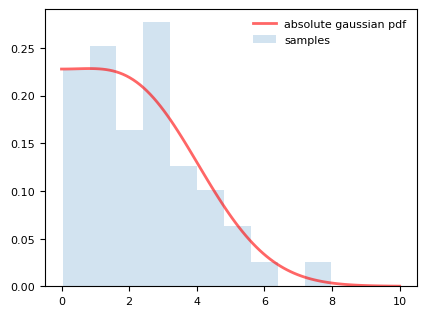

In [351]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4.8, 3.6)
x = np.linspace(0,10, 100)
mu = 2.1230310076243155
sigma = 4.269925412926472
ax.plot(x, foldnorm.pdf(x, c=mu/sigma**0.5, loc=0, scale=sigma**0.5),
       'r-', lw=2, alpha=0.6, label='absolute gaussian pdf')
ax.hist(y, bins=10, density=True, histtype='stepfilled', alpha=0.2, label='samples')
ax.legend(loc='best', frameon=False)
plt.show()

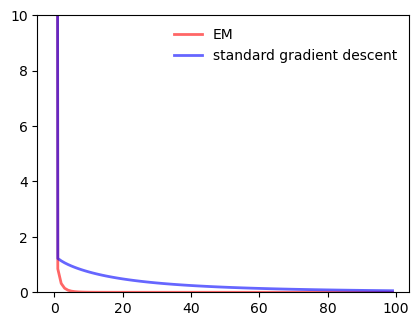

In [302]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4.8, 3.6)
lstar = trace1[-1]
x = np.arange(100)
ax.plot(x, lstar - trace1,'r-', lw=2, alpha=0.6, label='EM')
ax.plot(x, lstar - trace2,'b-', lw=2, alpha=0.6, label='standard gradient descent')
ax.legend(loc='best', frameon=False)
ax.set_ylim(0, 10)
plt.show()

### 图中明显看出EM算法更快，可能是因为这个似然函数两侧比较平坦，梯度下降算法速度很慢

## Problem 3

(1) Derive the variational inference update equations for estimating $γ$ and $φ$.

参考D. Blei,2003知，参数的更新公式如下：

for every document d:
$$
\phi^{t+1}_{dnk} = \beta_{kw_n}exp\{\Psi(\gamma_k)-\Psi(\sum_{k=1}^{K}\gamma_k)\}
$$
normalize $\phi$ to sum to 1
$$
\gamma^{t+1} = \alpha + \sum_{n=1}^{N}\phi_{dn}^{t+1}
$$
其中$\Psi$是digamma函数：
$$\Psi (x)={\frac {\mathrm {d} }{\mathrm {d} x}}\ln {\big (}\Gamma (x){\big )}$$

In [10]:
with open ("btc_hw4_lda_data.p", "rb") as handle :
    data_loaded = pickle.load ( handle )

In [396]:
def _exp_doc_topic(doc_topic_distr):
    """
    计算exp(E[log(theta)])
    :param doc_topic_distr: gamma_d
    """
    return psi(doc_topic_distr)-psi(np.sum(doc_topic_distr))

def _exp_topic_word(topic_word_distr):
    """
    计算exp(E[log(beta)]),因为这里beta是固定值所以就不算了
    """
    return topic_word_distr

def lda(X, alpha, beta, n_topic = 4, n_samples = 1, max_doc_update_iter=1000):
    D = X.shape[0]
    N = X.shape[1]
    # doc_topic_distr = alpha + N / n_topic  # gamma
    doc_topic_distr = np.ones((n_samples, n_topic))
    iters = 0
    for idx_d in range(n_samples):
        # initialize
        topic_word_distr = np.ones((N, n_topic)) / n_topic  # phi
        # 更新local parameters
        ids = np.nonzero(X[idx_d, :])[0]
        # topic_word_distr = topic_word_distr[ids, :]
        # cnts = X[idx_d, ids]
        for _ in range(max_doc_update_iter):
            last_gamma = np.array(doc_topic_distr[idx_d, :])
            # 更新phi
            exp_doc_topic = _exp_doc_topic(doc_topic_distr[idx_d, :])
            for n in ids:
                for k in range(n_topic):
                    topic_word_distr[n][k] = beta[n][k]*np.exp(exp_doc_topic[k])
                # normalize
                topic_word_distr[n, :] = topic_word_distr[n, :] / np.sum(topic_word_distr[n, :])
            # 更新gamma
            tmp = np.sum(topic_word_distr[ids, :], axis = 0)
            for k in range(n_topic):
                doc_topic_distr[idx_d][k] = alpha[k] + tmp[k]
            iters = iters + 1
            if np.abs(last_gamma - doc_topic_distr[idx_d, :]).max() < 1e-3:
                break
    return topic_word_distr, ids, doc_topic_distr, iters

(2) For individual one, run LDA inference to find $\phi$ for each genotype locus, store it as a matrix of size $n_1 × K$, and plot it as an image in your write up.

In [397]:
phi, ids, _, _ = lda(data_loaded['data'], alpha = 0.1*np.ones(4), beta = data_loaded['beta_matrix'])

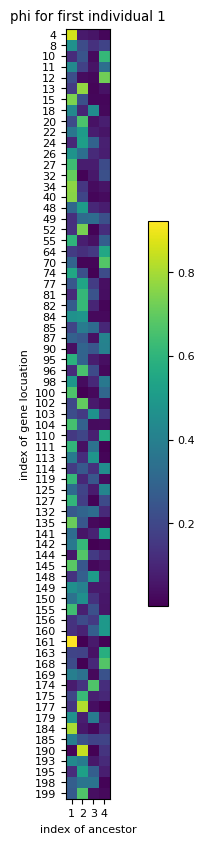

In [408]:
plt.figure(figsize=(10,10))
im = plt.imshow(phi[ids, :])
plt.colorbar(im, shrink = 0.5)
plt.yticks(np.arange(len(ids)),ids)
plt.xticks([0,1,2,3],[1,2,3,4])
plt.xlabel('index of ancestor')
plt.ylabel('index of gene locuation')
plt.title('phi for first individual 1')
plt.show()

(3)  We will construct a matrix $\Theta$ of size $M × K$ to represent the ancestor assignments for all individuals in the population.Visualize $\Theta$ as an image.

In [399]:
_, _, Theta, iters = lda(data_loaded['data'], alpha = 0.1*np.ones(4), beta = data_loaded['beta_matrix'], n_samples = 100)

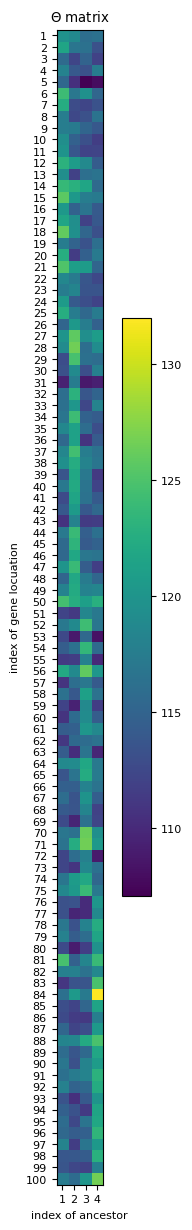

In [407]:
plt.figure(figsize=(5,15))
im = plt.imshow(Theta)
plt.colorbar(im, shrink = 0.5)
plt.yticks(np.arange(0, 100),np.arange(0, 100)+1 )
plt.xticks([0,1,2,3],[1,2,3,4])
plt.xlabel('index of ancestor')
plt.ylabel('index of gene locuation')
plt.title('$\Theta$ matrix')
plt.show()

(4) Report the number of iterations needed to get to convergence for running inference on all M individuals

In [401]:
iters

5420

(5) Repeat the experiment for $α = 0.01, α = 1, α = 10$, and for each of $α$, visualize the $\Theta$ matrix summarizing the ancestor population assignments for all individuals.

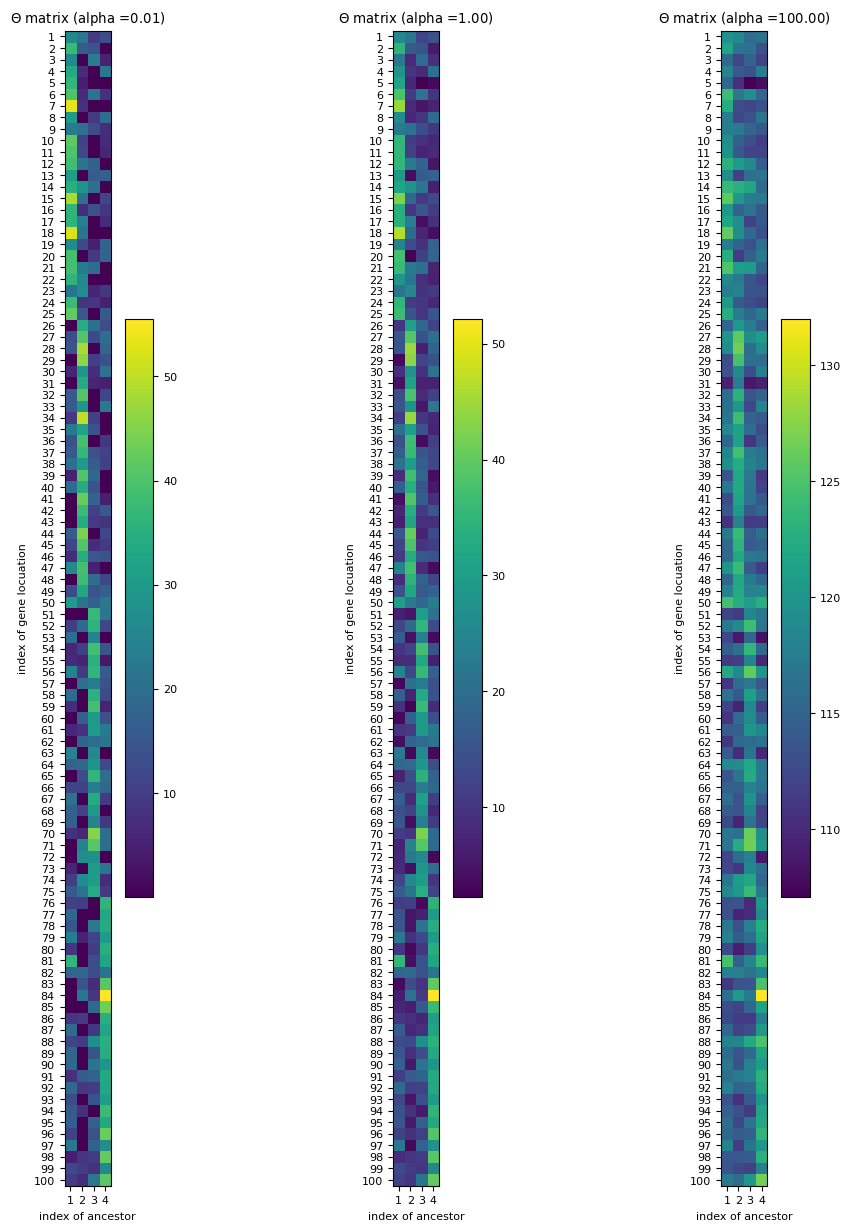

In [406]:
plt.figure(figsize=(12,15))
a = [0.01, 1, 100]
for i in range(3):
    plt.subplot(131+i)
    _, _, Theta, _ = lda(data_loaded['data'], alpha = a[i]*np.ones(4), beta = data_loaded['beta_matrix'], n_samples = 100)
    im = plt.imshow(Theta)
    plt.colorbar(im, shrink = 0.5)
    plt.yticks(np.arange(0, 100),np.arange(0, 100)+1 )
    plt.xticks([0,1,2,3],[1,2,3,4])
    plt.xlabel('index of ancestor')
    plt.ylabel('index of gene locuation')
    plt.title('$\Theta$ matrix (alpha =%.2f)'%a[i])
plt.show()

### 整体的趋势是，随着$\alpha$的增大，各主题之间的混合更加均匀，表现为矩阵颜色越来越浅
### $\alpha=0.01$时每个文档倾向于来源于同一个主题，比如图中可以看出1-25号主要由主题1生成，26-50号主要由主题2生成等等